# Credit Card Fraud Detection

The dataset used is retrieved from: https://www.kaggle.com/mlg-ulb/creditcardfraud

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

The pupose of this project is to identify fraudulent credit card transactions and clearly it's a problem of classification.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**Loading Dataset**

In [3]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null values in the dataset which indicates that our dataset is clean

In [7]:
data.shape

(284807, 31)

Number of rows and columns in our dataset is 284807 and 31

In [9]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [14]:
data['Class'].unique()

array([0, 1])

Class 1 for fraudulent transactions , 0 otherwise

Text(0, 0.5, 'Frequency')

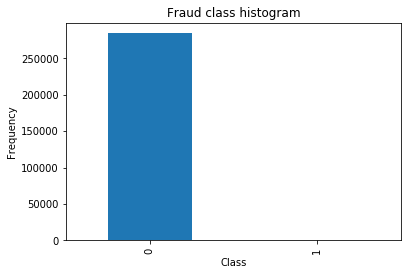

In [11]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

Note that the dataset is very imbalance. If we use this dataset for model evaluation and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud but let's try first with this dataset and see the results

**Training a model**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
y=data['Class']
X=data.drop(['Class'],axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [20]:
model=LogisticRegression(solver='lbfgs',max_iter=1000)

In [21]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
model.score(X_test,y_test)

0.9991573329588147

The accuracy with a logistic regression model is really good somewhere around 99.9%

Let's do something about the data imbalance

Data imbalance can be treated with resampling the data. Data resampling can be of two types:

1. Under-sampling

under sampling-Undersampling aims to balance class distribution by randomly eliminating majority class examples. This is done until the majority and minority class instances are balanced out.

2. Over-sampling

Over-Sampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.

**Under-sampling**

In [24]:
df_fraud=data[data.Class == 1]

In [25]:
df_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [26]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 541 to 281674
Data columns (total 31 columns):
Time      492 non-null float64
V1        492 non-null float64
V2        492 non-null float64
V3        492 non-null float64
V4        492 non-null float64
V5        492 non-null float64
V6        492 non-null float64
V7        492 non-null float64
V8        492 non-null float64
V9        492 non-null float64
V10       492 non-null float64
V11       492 non-null float64
V12       492 non-null float64
V13       492 non-null float64
V14       492 non-null float64
V15       492 non-null float64
V16       492 non-null float64
V17       492 non-null float64
V18       492 non-null float64
V19       492 non-null float64
V20       492 non-null float64
V21       492 non-null float64
V22       492 non-null float64
V23       492 non-null float64
V24       492 non-null float64
V25       492 non-null float64
V26       492 non-null float64
V27       492 non-null float64
V28       492 non-null

In [27]:
df_genuine=data[data.Class == 0]

In [28]:
df_genuine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284315 entries, 0 to 284806
Data columns (total 31 columns):
Time      284315 non-null float64
V1        284315 non-null float64
V2        284315 non-null float64
V3        284315 non-null float64
V4        284315 non-null float64
V5        284315 non-null float64
V6        284315 non-null float64
V7        284315 non-null float64
V8        284315 non-null float64
V9        284315 non-null float64
V10       284315 non-null float64
V11       284315 non-null float64
V12       284315 non-null float64
V13       284315 non-null float64
V14       284315 non-null float64
V15       284315 non-null float64
V16       284315 non-null float64
V17       284315 non-null float64
V18       284315 non-null float64
V19       284315 non-null float64
V20       284315 non-null float64
V21       284315 non-null float64
V22       284315 non-null float64
V23       284315 non-null float64
V24       284315 non-null float64
V25       284315 non-null float64
V26  

In [29]:
# Randomly selecting 4000 rows from the genuine dataset

df_new_genuine=df_genuine.iloc[58457:60457]

In [30]:
# Combining both the datasets with genuine transaction details and fraud transaction details

train_new = pd.concat([df_new_genuine, df_fraud],ignore_index=True, sort =False)

In [31]:
train_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,48472.0,-1.234256,1.398540,1.003628,-0.262309,0.137859,-0.640664,0.813182,-0.097181,0.042451,...,-0.366621,-0.645533,0.023888,-0.109927,0.098936,0.117121,0.599932,0.355901,30.99,0
1,48473.0,-0.518847,1.025087,-0.614624,-0.780959,2.474666,3.335055,0.046111,0.794249,-0.322448,...,-0.193099,-0.708348,0.145672,0.944217,-0.788017,0.039995,0.010804,0.254309,4.49,0
2,48474.0,1.246761,-0.110908,0.365160,-0.275377,-0.728505,-1.010252,-0.154272,-0.101331,0.030232,...,0.063949,0.148988,-0.014852,0.623723,0.224084,1.422479,-0.121069,-0.013387,8.00,0
3,48474.0,1.193931,0.133560,0.084222,1.082113,0.285265,0.599312,-0.084895,0.204928,0.141819,...,-0.112864,-0.119823,-0.166573,-0.810306,0.734020,-0.276402,0.034184,-0.004690,1.00,0
4,48474.0,-0.525706,0.635492,1.614563,1.477665,-0.129921,0.000732,0.455523,-0.093269,0.472379,...,-0.012395,0.507298,-0.018121,0.409624,-0.206987,-0.231015,-0.017270,-0.094011,24.87,0


In [32]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 31 columns):
Time      2492 non-null float64
V1        2492 non-null float64
V2        2492 non-null float64
V3        2492 non-null float64
V4        2492 non-null float64
V5        2492 non-null float64
V6        2492 non-null float64
V7        2492 non-null float64
V8        2492 non-null float64
V9        2492 non-null float64
V10       2492 non-null float64
V11       2492 non-null float64
V12       2492 non-null float64
V13       2492 non-null float64
V14       2492 non-null float64
V15       2492 non-null float64
V16       2492 non-null float64
V17       2492 non-null float64
V18       2492 non-null float64
V19       2492 non-null float64
V20       2492 non-null float64
V21       2492 non-null float64
V22       2492 non-null float64
V23       2492 non-null float64
V24       2492 non-null float64
V25       2492 non-null float64
V26       2492 non-null float64
V27       2492 non-null float

In [33]:
y_2=train_new['Class']
X_2=train_new.drop(['Class'],axis=1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.20)

In [35]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
model.score(X_test,y_test)

0.9679358717434869

**Over-sampling**

In [37]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
for _ in range(5):
    df_fraud = pd.concat([df_fraud, df_fraud],ignore_index=True, sort =False)

Running the above cell will replicate the df_fraud dataframe, creating a dataframe with more rows with the same data.

In [39]:
df_fraud_new=df_fraud

In [40]:
df_fraud_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15744 entries, 0 to 15743
Data columns (total 31 columns):
Time      15744 non-null float64
V1        15744 non-null float64
V2        15744 non-null float64
V3        15744 non-null float64
V4        15744 non-null float64
V5        15744 non-null float64
V6        15744 non-null float64
V7        15744 non-null float64
V8        15744 non-null float64
V9        15744 non-null float64
V10       15744 non-null float64
V11       15744 non-null float64
V12       15744 non-null float64
V13       15744 non-null float64
V14       15744 non-null float64
V15       15744 non-null float64
V16       15744 non-null float64
V17       15744 non-null float64
V18       15744 non-null float64
V19       15744 non-null float64
V20       15744 non-null float64
V21       15744 non-null float64
V22       15744 non-null float64
V23       15744 non-null float64
V24       15744 non-null float64
V25       15744 non-null float64
V26       15744 non-null float64


Now the dataframe has 15744 rows for the fraud class.

We can proceed with this over-sampled data for training and prediction.

In [41]:
df_fraud_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


Concatenating the two dataframes

In [42]:
train_new_1 = pd.concat([df_genuine, df_fraud_new],ignore_index=True, sort =False)

Shuffling the dataset

In [44]:
train_new_1 .iloc[np.random.permutation(len(train_new_1 ))]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
201391,134034.0,2.050541,-0.364329,-2.542955,-0.729276,2.388357,3.318051,-0.479005,0.791533,0.403362,...,-0.293302,-0.834855,0.381652,0.698185,-0.264835,0.219264,-0.052150,-0.066923,0.99,0
269230,163736.0,-0.796664,1.306215,-0.546871,-1.085272,0.806305,-0.083288,0.713804,0.342474,0.218415,...,-0.238259,-0.397263,0.034779,0.065340,-0.692203,0.126116,0.300277,0.095598,2.26,0
162227,115227.0,-0.229816,-0.408488,-0.003175,-1.975396,0.493375,-0.909535,0.496873,-0.458512,-1.050713,...,0.429975,1.489013,-0.008408,-0.367007,0.002799,-0.030599,-0.293531,-0.277323,15.00,0
103145,68624.0,-0.657946,0.407021,2.471143,-0.784030,-0.513765,0.093420,-0.097658,0.325871,0.070567,...,-0.004694,-0.018005,-0.273754,0.061886,-0.019075,1.023467,-0.009272,0.049563,2.90,0
88721,62352.0,0.041327,-2.919733,0.470245,-0.060742,-1.824044,1.131552,-0.604765,0.345343,-0.132307,...,0.471275,0.170235,-0.473210,-0.239475,-0.032985,-0.265158,-0.034003,0.112596,614.96,0
151997,97265.0,2.032425,-0.211718,-1.011462,0.487072,-0.179614,-0.919934,-0.067307,-0.356914,2.470495,...,-0.073947,0.326920,0.017669,-0.113357,0.184871,0.162046,-0.057112,-0.068135,19.50,0
235154,148449.0,2.193873,-0.671823,-1.463793,-0.887142,-0.518152,-1.533016,-0.110715,-0.448220,-0.627714,...,0.054420,0.039830,0.193564,-0.036175,-0.080451,-0.313682,-0.055026,-0.059858,35.00,0
232797,147488.0,-1.000645,-5.945578,-4.539506,0.413580,-1.278552,-0.777350,2.661093,-1.002418,-1.164089,...,1.499376,0.460327,-1.703721,0.775591,0.135196,0.096546,-0.425077,0.208932,1724.00,0
176166,122806.0,1.947280,-0.559173,-0.695414,0.161529,-0.186140,0.391960,-0.633829,0.094240,0.891481,...,0.217069,0.804745,-0.042264,-1.002281,-0.110282,0.655830,-0.024798,-0.061938,43.99,0
243343,152071.0,-0.517845,-0.222148,-0.002372,-0.032122,-0.486598,-0.319725,2.152346,-0.495272,-0.017614,...,0.218633,0.308316,0.802707,-0.120622,-0.880600,0.440167,-0.096327,0.050300,374.58,0


In [45]:
train_new_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300059 entries, 0 to 300058
Data columns (total 31 columns):
Time      300059 non-null float64
V1        300059 non-null float64
V2        300059 non-null float64
V3        300059 non-null float64
V4        300059 non-null float64
V5        300059 non-null float64
V6        300059 non-null float64
V7        300059 non-null float64
V8        300059 non-null float64
V9        300059 non-null float64
V10       300059 non-null float64
V11       300059 non-null float64
V12       300059 non-null float64
V13       300059 non-null float64
V14       300059 non-null float64
V15       300059 non-null float64
V16       300059 non-null float64
V17       300059 non-null float64
V18       300059 non-null float64
V19       300059 non-null float64
V20       300059 non-null float64
V21       300059 non-null float64
V22       300059 non-null float64
V23       300059 non-null float64
V24       300059 non-null float64
V25       300059 non-null float64
V26  

In [46]:
y_3=train_new_1['Class']
X_3=train_new_1.drop(['Class'],axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.20)

In [48]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
model.score(X_test,y_test)

0.9887022595480904

**Conclusion**

First I used logistic regression on an overfitted data then I did some sampling and again performed logistic regression on the data. I did both under-sampling and over-sampling and checked the performance of our model.

I achieved 0.9679 accuracy score doing under-sampling and 0.9887 with over-sampling.

In conclusion, it is always better to do sampling on the dataset if it is imbalanced to give the model appropriate number of examples of both the target for better training and prediction.